https://www.kaggle.com/c/nlp-getting-started/data?select=train.csv

In [54]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
import re
import seaborn as sns
import nltk
import scipy
import matplotlib.pyplot as plt
import networkx as nx
from gensim.models import word2vec
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('train.csv')
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_test.shape

(3263, 4)

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krishnadevabhaktuni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    #review = re.sub(r'^https?:\/\/.*[\r\n]*', '', df['text'][i], flags=re.MULTILINE)
    #review = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', df['text'][i], flags=re.MULTILINE)
    review = re.sub(r"http\S+", "", df['text'][i])
    review = re.sub('[^a-zA-Z\d+]', ' ', review)#how can I keep the numbers
    review = re.sub('[0-9]', '', review)
    review = review.lower()
    review = review.split()
    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = [lemmatizer.lemmatize(word, pos = 'v') for word in review if not word in stopwords.words('english')]
    review = [lemmatizer.lemmatize(word, pos = 'n') for word in review]
    review = [lemmatizer.lemmatize(word, pos = 'a') for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [8]:
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)
most_freq[0:10]

['get', 'like', 'fire', 'amp', 'go', 'u', 'bomb', 'new', 'via', 'one']

In [9]:
sentence_vectors = []
for sentence in corpus:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)
sentence_vectors = np.asarray(sentence_vectors)

In [10]:
sentence_vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)
X = cv.fit_transform(corpus).toarray()

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [13]:
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[751 135]
 [210 427]]


In [15]:
print("Training set score using Naive Bayes Classifier: {:.2f}".format(clf.score(X_train, y_train)))
print("Testing set score using Naive Bayes Classifier: {:.2f}" .format(clf.score(X_test, y_test)))

Training set score using Naive Bayes Classifier: 0.81
Testing set score using Naive Bayes Classifier: 0.77


In [25]:
lr = LogisticRegression()
print(X_train.shape, y_train.shape)
train = lr.fit(X_train, y_train)
print('Training set score using Logistic Regression:{:.2f}'.format(train.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(train.score(X_test, y_test)))

(6090, 1000) (6090,)
Training set score using Logistic Regression:0.85
Test set score:0.80


In [17]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()
train1 = rfc.fit(X_train, y_train)

print('Training set score using Random forest Classifier:{:.2f}'.format(rfc.score(X_train, y_train)))
print('Test set score using Random Forest Classifier:{:.2f}'.format(rfc.score(X_test, y_test)))

Training set score using Random forest Classifier:0.98
Test set score using Random Forest Classifier:0.78


In [18]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv1 = TfidfVectorizer()
X_td = cv1.fit_transform(corpus).toarray()

In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_td, y, test_size = 0.20, random_state = 0)

In [21]:
clf1 = MultinomialNB().fit(X_train1, y_train1)
y_pred1 = clf1.predict(X_test1)
confusion_td = confusion_matrix(y_test1, y_pred1)
print(confusion_td)
print(clf1.score(X_train1, y_train1))
print(clf1.score(X_test1, y_test1))

[[791  95]
 [212 425]]
0.8975369458128079
0.7984241628365069


In [26]:
train1 = lr.fit(X_train1, y_train1)
print('Training set score:', lr.score(X_train1, y_train1))
print('Test set score:', lr.score(X_test1, y_test1))

Training set score: 0.8830870279146141
Test set score: 0.8069599474720945


In [27]:
text1 = df['text']

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/krishnadevabhaktuni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
text = df['text']

In [31]:
nlp = spacy.load('en_core_web_sm')
text_doc = nlp('text')

In [82]:
tokens = []
for sent in corpus:
    for word in tweet_tokenizer.tokenize(sent):
        if len(word) < 2:
            continue
        tokens.append(word.lower())

In [84]:
len(tokens)

68619

In [85]:
len(tweet_tokens)

7613

In [62]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
tweet_tokens = []
for sent in corpus:
    print(tweet_tokenizer.tokenize(sent))
    tweet_tokens.append(tweet_tokenizer.tokenize(sent))

['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'u']
['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']
['resident', 'ask', 'shelter', 'place', 'notify', 'officer', 'evacuation', 'shelter', 'place', 'order', 'expect']
['people', 'receive', 'wildfire', 'evacuation', 'order', 'california']
['get', 'send', 'photo', 'ruby', 'alaska', 'smoke', 'wildfire', 'pour', 'school']
['rockyfire', 'update', 'california', 'hwy', 'close', 'direction', 'due', 'lake', 'county', 'fire', 'cafire', 'wildfire']
['flood', 'disaster', 'heavy', 'rain', 'cause', 'flash', 'flood', 'street', 'manitou', 'colorado', 'spring', 'area']
['top', 'hill', 'see', 'fire', 'wood']
['emergency', 'evacuation', 'happen', 'build', 'across', 'street']
['afraid', 'tornado', 'come', 'area']
['three', 'people', 'die', 'heat', 'wave', 'far']
['haha', 'south', 'tampa', 'get', 'flood', 'hah', 'wait', 'second', 'live', 'south', 'tampa', 'gonna', 'gonna', 'fvck', 'flood']
['rain', 'flood', 'florida', 'tampabay', 'tamp

['itsmegss', 'think', 'well', 'bloody', 'bark']
['eh', 'hello', 'cover', 'bloody', 'thigh', 'bloody', 'cleav', 'eh', 'hello', 'since', 'expose', 'cleavage']
['mariasherwood', 'johnjcampbell', 'mega', 'bloody', 'marvellous']
['bloody', 'mary', 'sink', 'beet', 'juice']
['melrises', 'gayler', 'wwwbigbaldhead', 'jessienojoke', 'melissaross', 'monty', 'python', 'date', 'bloody', 'far', 'want', 'go']
['meet', 'bloody', 'r']
['friday', 'suppose', 'happy', 'day', 'bloody', 'friday', 'hah', 'zzzz']
['chxrmingprince', 'jones', 'luna', 'bloody', 'hope', 'say', 'fold', 'arm', 'sit', 'back', 'chair']
['wait', 'tell', 'college', 'friend', 'reafs', 'bloody', 'mary', 'drama', 'cd']
['come', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['watch', 'episode', 'se', 'bloody', 'monday', 'bloodymonday', 'tvshowtime']
['marlon', 'williams', 'gt', 'elvis', 'presley', 'gt', 'marlon', 'williams', 'gt', 'steel', 'panther', 'shuffle', 'mode', 'like', 'bloody', '

['hope', 'fall', 'cliff']
['let', 'style', 'fall', 'flat', 'summer', 'lord', 'amp', 'cliff', 'thinkpink', 'magichairbump', 'answer', 'add']
['deep', 'sleep', 'dream', 'bout', 'fall', 'cliff', 'wake', 'struggle', 'keep', 'balance']
['currently', 'want', 'drive', 'car', 'cliff', 'fall', 'death']
['hope', 'fall', 'cliff']
['accidentally', 'kill', 'day', 'snap', 'streak', 'wanna', 'accidentally', 'fall', 'cliff']
['punkblunts', 'sincerelyevelnn', 'fall', 'cliff', 'hell', 'idc']
['photographer', 'brian', 'ruebs', 'endure', 'foot', 'climb', 'capture', 'bride', 'groom']
['szmnextdoor', 'get', 'cute', 'lil', 'cliff', 'fall']
['hope', 'u', 'trip', 'n', 'fall', 'cliff', 'tweet']
['news', 'update', 'huge', 'cliff', 'landslide', 'road', 'china', 'watch', 'moment', 'cliff', 'collapse', 'huge', 'chunk', 'rock', 'fall']
['huge', 'cliff', 'landslide', 'road', 'china', 'watch', 'moment', 'cliff', 'collapse', 'huge', 'chunk', 'rock', 'fall', 'onto', 'r']
['one', 'day', 'want', 'someone', 'run', 'ferry',

['valdes', 'forgive', 'bite', 'testy', 'deluge', 'hatred', 'amp', 'lose', 'patience']
['news', 'alert', 'glimpse', 'hyderabad', 'deluge', 'heavy', 'rainfall']
['afterwards', 'alone', 'hour', 'savour', 'prolong', 'almost', 'physical', 'intensity', 'feel', 'deluge', 'sigue']
['come', 'back', 'gt', 'gt', 'fly', 'ant', 'day', 'capital', 'deluge', 'annual', 'swarm', 'wing', 'insect']
['rand', 'paul', 'debate', 'strategy', 'demolish', 'bad', 'idea', 'point', 'maybe', 'em']
['enugu', 'government', 'demolish', 'illegal', 'structure', 'international', 'conference', 'centre']
['enugu', 'government', 'demolish', 'illegal', 'structure', 'international', 'conference', 'centre', 'enugu', 'state', 'government', 'app']
['doone', 'silver', 'architect', 'permission', 'demolish', 'birmingham', 'natwest', 'tower', 'replace', 'city', 'tall', 'build']
['u', 'four', 'demolish', 'createdunique', 'keren', 'serpa', 'arianareed']
['enugu', 'state', 'government', 'appear', 'set', 'recover', 'portion', 'enugu', 'i

['devastate', 'today', 'allegation']
['keegan', 'devastate']
['emmerdale', 'devastate', 'cain', 'great', 'character']
['stuart', 'broad', 'prime', 'minister', 'yet', 'best', 'thing', 'sport', 'see', 'year', 'aussie', 'look', 'devastate', 'bless']
['obama', 'declare', 'disaster', 'typhoon', 'devastate', 'saipan', 'obama', 'sign', 'disaster', 'declaration', 'northern', 'marians']
['wesleylowery', 'go', 'survive', 'devastation']
['utter', 'shock', 'devastation', 'go', 'work', 'leave', 'feel', 'life', 'really', 'short']
['fragile', 'global', 'economy', 'consider', 'devastation', 'alternative', 'would', 'cause', 'best', 'reason']
['kalmikya', 'astrakhan', 'volgagrad', 'dagestan', 'already', 'food', 'leave', 'locust', 'via', 'timeworld']
['year', 'atomic', 'bomb', 'japan', 'still', 'struggle', 'war', 'past', 'anniversary', 'devastation', 'work', 'b']
['obsolete', 'devastation', 'broad', 'ball', 'root', 'bat', 'hand', 'great', 'day', 'ash', 'engvaus']
['latestnews', 'cnbc', 'cnn', 'anniversar

['missionhills', 'ca', 'nurse', 'register', 'nurse', 'emergency', 'department', 'full', 'time', 'providence', 'health', 'amp', 'service']
['saw', 'car', 'fully', 'engulf', 'flame', 'hahah']
['men', 'escape', 'car', 'engulf', 'flame', 'parley', 'canyon', 'crew', 'investigate', 'cause']
['men', 'escape', 'car', 'engulf', 'flame', 'parley', 'canyon', 'crew', 'investigate', 'cause']
['come', 'land', 'engulf', 'tribal', 'war', 'turn', 'land', 'peace', 'e', 'madinah', 'prophetmuhammad', 'islam']
['trafficalert', 'eastbound', 'freeway', 'citrus', 'ave', 'azusa', 'two', 'motorcycle', 'involve', 'accident', 'one', 'fully', 'engulf', 'flame', 'lane']
['men', 'escape', 'car', 'engulf', 'flame', 'parley', 'canyon', 'crew', 'investigate', 'cause']
['come', 'land', 'engulf', 'tribal', 'war', 'turn', 'land', 'peace', 'e', 'madinah', 'prophetmuhammad', 'islam']
['tube', 'strike', 'live', 'late', 'travel', 'update', 'london', 'engulf', 'chaos', 'cross', 'london', 'travel', 'accepte']
['get', 'engulf', 

['imagine', 'get', 'flatten', 'kurt', 'zouma']
['fallacy', 'steam', 'roller', 'object', 'whether', 'flatten', 'robertcalifornia', 'thereisonlysex']
['photo', 'beach', 'earring', 'beach', 'jewelry', 'vacation', 'earring', 'keep', 'calm', 'beach', 'earring', 'make', 'flatten']
['mix', 'new', 'flat', 'double', 'side', 'linerless', 'bottle', 'cap', 'choose', 'mix', 'flatten', 'full']
['bigburgerboi', 'flat', 'football', 'like', 'flatten', 'spartan', 'crush', 'back', 'day', 'hail']
['satanaofhell', 'ever', 'see', 'far', 'dreamy', 'look', 'come', 'face', 'ear', 'flatten', 'start', 'walk', 'slowly', 'toward']
['mix', 'new', 'flat', 'double', 'side', 'linerless', 'bottle', 'cap', 'choose', 'mix', 'flatten', 'full']
['fizzy', 'sit', 'regular', 'flood', 'seat', 'one', 'know']
['jkl', 'cancel', 'flash', 'flood', 'warn', 'bell', 'harlan', 'knox', 'ky', 'wx']
['spot', 'flood', 'combo', 'inch', 'w', 'curve', 'cree', 'lead', 'work', 'light', 'bar', 'x', 'offroad', 'fog', 'lamp', 'full']
['spot', 'flo

['hurricane', 'guillermo', 'live', 'noaa', 'track', 'loop', 'wed', 'aug', 'th']
['hurricane', 'dolce', 'happy', 'birthday', 'big', 'bruh']
['guy', 'reginald', 'lol', 'welcome']
['hurricane', 'dame']
['bluedio', 'turbine', 'hurricane', 'h', 'bluetooth', 'wireless', 'stereo', 'headphone', 'headset', 'blk', 'full']
['lavapixcom', 'see', 'hurricane', 'guillermo', 'meteoearth']
['chubbysquirrel', 'hurricane', 'surge', 'true', 'gt']
['name', 'hurricane', 'black', 'people', 'name', 'terrify', 'hurricane', 'shanaynay']
['shootas', 'hungry', 'body', 'burner']
['hurricane', 'stm', 'quem', 'lembra']
['hurricane', 'sick']
['ad', 'mile', 'hurricane', 'fun', 'make', 'wet', 'hot']
['hurricane', 'dancer', 'first', 'caribbean', 'pirate', 'shipwreck', 'margarita', 'engle', 'henry', 'holt', 'co', 'byr']
['cape', 'coral', 'city', 'leader', 'take', 'part', 'mock', 'hurricane', 'train']
['careful', 'hurricane', 'season']
['back', 'sunburn']
['freegeezy', 'stay', 'houston']
['nowplaying', 'rock', 'like', 'hu

['aug', 'fort', 'calhoun', 'nuclear', 'station', 'capacity', 'today', 'accord', 'nrc']
['snowywolf', 'thegreenparty', 'besides', 'would', 'rather', 'shut', 'whole', 'nuclear', 'reactor', 'maintenance', 'wind', 'turbine', 'time']
['hamptonroadsfor', 'u', 'navy', 'sideline', 'new', 'sub']
['year', 'boy', 'scout', 'create', 'mini', 'nuclear', 'reactor', 'home']
['dicehateme', 'puppyshogun', 'make', 'sense', 'paper', 'beat', 'rock', 'paper', 'come', 'wood', 'wood', 'able', 'support', 'obliterate', 'rock']
['people', 'republic', 'china', 'proc', 'abandon', 'west', 'philippine', 'sea', 'via', 'changepilipinas']
['realdonaldtrump', 'obliterate', 'notion', 'amp', 'pattern', 'political', 'style', 'seemly', 'lead', 'voter', 'belief', 'sarcasm', 'narcissism', 'richhomeydon', 'swag', 'usa', 'like']
['fun', 'instagramers', 'jeb', 'bush', 'say', 'early', 'week', 'want', 'obliterate', 'plan', 'parenthood', 'bu']
['souda', 'leave', 'lady', 'sonia', 'alone', 'shall', 'obliterate', 'kneelbot']
['klavier

['realize', 'maybe', 'normal', 'sit', 'front', 'uber', 'driver', 'panic']
['c', 'pinto', 'see', 'people', 'panic', 'orpik']
['ay', 'fully', 'panic', 'lol']
['let', 'drive', 'truck', 'start', 'panic', 'flip', 'bitch']
['jeannathomas', 'gonna', 'lie', 'panic', 'little', 'bite', 'vic', 'hardy', 'freeman', 'practice']
['people', 'finally', 'panic', 'cable', 'tv']
['stop', 'panic', 'ogtomd']
['si', 'sit', 'cam', 'w', 'panic']
['people', 'panic', 'result', 'day', 'though', 'hahahah', 'like', 'worry', 'go', 'change', 'result']
['america', 'say', 'war', 'terrorism', 'police', 'take', 'ar', 'ready', 'start', 'shoot', 'enemy']
['police', 'gunman', 'report', 'dead', 'nashville', 'area', 'theater', 'suspect', 'carry', 'gun', 'hatchet', 'carmi']
['break', 'police', 'officer', 'arrest', 'abuse', 'child', 'police', 'run', 'boot', 'camp', 'san', 'luis', 'obispo', 'calif']
['fuck', 'police', 'touch', 'fuck', 'nigga', 'fuck', 'w']
['world', 'news', 'qld', 'police', 'wrap', 'billy', 'gordon', 'investigat

['like', 'youtube', 'video', 'thorin', 'thought', 'riot', 'sandbox', 'mode', 'lol']
['stuart', 'broad', 'take', 'eight', 'joe', 'root', 'run', 'riot', 'aussie', 'stuart', 'broad', 'take', 'career', 'best', 'figure']
['retweeted', 'sarah', 'silverman', 'sarahksilverman', 'soundtrack', 'walk', 'start', 'w', 'tracey', 'ullman', 'know', 'perfect']
['meat', 'love', 'feminist', 'world', 'riot', 'grill', 'arrive']
['time', 'riot', 'really', 'make', 'official', 'satan', 'teemo', 'skin']
['like', 'youtube', 'video', 'sick', 'riot', 'shield', 'slide', 'spot']
['bytorrecilla', 'torrecilla', 'always', 'info', 'secret', 'lol', 'game', 'check', 'secret', 'get', 'riot', 'point', 'bio']
['transwomen', 'drag', 'queen', 'color', 'lead', 'riot', 'well', 'know', 'butch', 'lesbian', 'usually', 'credit', 'incite']
['eacau', 'pre', 'order', 'film', 'itunes', 'amp', 'watch', 'yay']
['without', 'ally', 'near', 'use', 'skill', 'get', 'hire', 'really', 'cause', 'make', 'every', 'riot', 'staff', 'member', 'look',

['feel', 'like', 'sink', 'unhappiness', 'take', 'quiz']
['horrible', 'sink', 'feel', 'home', 'phone', 'realise', 'g', 'whole', 'time']
['sink', 'last', 'episode', 'heart', 'hurt', 'bad']
['slowly', 'sink', 'waste', 'edsheeran']
['tribe', 'keep', 'sink', 'everyday', 'seem', 'fast', 'year', 'titanic', 'disaster']
['horrible', 'sink', 'feel', 'home', 'phone', 'realise', 'g', 'whole', 'time']
['time', 'try', 'always', 'end', 'sink']
['feel', 'like', 'sink', 'unhappiness', 'take', 'quiz']
['make', 'weird', 'high', 'pitch', 'noise', 'hear', 'siren', 'ofnsixjks']
['today', 'corii', 'siren', 'birthday', 'spoil', 'wishlist']
['maroute', 'haha', 'jam', 'imeshika', 'hapa', 'garden', 'city', 'mat', 'bumper', 'bumper', 'aar', 'ambulance', 'decide', 'chill', 'via', 'bonnieg', 'piga', 'siren', 'kijan']
['stacedemon', 'oh', 'shit']
['big', 'love', 'ibeyiofficial']
['amateur', 'night', 'actress', 'reprise', 'role', 'siren', 'horrormovies', 'ca', 'horror']
['lol', 'jbone', 'cousin', 'foxy', 'siren', 'co

['jetstar', 'virgin', 'force', 'cancel', 'bali', 'flight', 'ash', 'mount', 'raung', 'volcano']
['nside', 'dragon', 'belly', 'ice', 'cave', 'volcano', 'kamchatka', 'photography', 'daniel', 'korzhonov']
['japan', 'aogashima', 'volcano', 'unknown', 'check', 'aogashima', 'japan', 'photography', 'volcano']
['earthquake', 'sismo', 'km', 'volcano', 'hawaii', 'time', 'utc']
['maailiss', 'diaporama', 'sixpenceee', 'karymsky', 'lake', 'crater', 'lake', 'locate', 'karymsky', 'volcano', 'russia']
['earthquake', 'occur', 'km', 'volcano', 'hawaii', 'utc', 'earthquake', 'volcano']
['earthquake', 'km', 'volcano', 'hawaii', 'iphone', 'user', 'download', 'earthquake', 'app', 'information']
['eruption', 'indonesian', 'volcano', 'spark', 'transport', 'chaos', 'picture', 'do', 'video', 'mount', 'raung']
['shoe', 'asics', 'gt', 'ii', 'super', 'red', 'ronnie', 'fieg', 'kith', 'red', 'white', 'x', 'gel', 'grey', 'volcano']
['usgs', 'report', 'earthquake', 'km', 'volcano', 'hawaii', 'utc', 'quake']
['usgs', 'e

In [33]:
from collections import Counter

# Utility function to calculate how frequently words appear in the text.
def word_frequencies(tweet_tokens, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in tweet_tokens:
        for j in token:
            print(j)
            print(type(j))
            if not j.is_punct and (not j.is_stop or include_stop):
                words.append(j.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)

In [ ]:
#text_freq = word_frequencies(tweet_tokens).most_common(10)
#text_freq

In [ ]:
corpi = []
for i in range(0, len(df)):
    text1 = re.sub(r"http\S+", "", text[i])
    corpi.append(text1)


In [34]:
corpus1 = []
for i in range(0, len(df)):
    #review = re.sub(r'^https?:\/\/.*[\r\n]*', '', df['text'][i], flags=re.MULTILINE)
    #review = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', df['text'][i], flags=re.MULTILINE)
    review1 = re.sub(r"http\S+", "", df['text'][i])
    review1 = re.sub('[^a-zA-Z\d+]', ' ', review1)#how can I keep the numbers
    #review = review.lower()
    review1 = review1.split()
    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    #review = [lemmatizer.lemmatize(word, pos = 'v') for word in review if not word in stopwords.words('english')]
    #review = [lemmatizer.lemmatize(word, pos = 'n') for word in review]
    #review = [lemmatizer.lemmatize(word, pos = 'a') for word in review]
    review1 = ' '.join(review1)
    corpus1.append(review1)

In [35]:
nlp = spacy.load('en_core_web_sm')
corpus_spacy = []
for i in corpus1:
    text_doc = nlp(i)
    corpus_spacy.append(text_doc)

In [36]:
from collections import Counter

# Utility function to calculate how frequently words appear in the text.
def word_frequencies(corpus_spacy, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in corpus_spacy:
        for j in token:
            if not j.is_punct and (not j.is_stop or include_stop):
                words.append(j.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)

In [37]:
def word_frequencies(corpus, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in corpus:
        for j in token:
            if not j.is_punct and (not j.is_stop or include_stop):
                words.append(j.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)

In [38]:
corpus_freq = word_frequencies(corpus_spacy).most_common(50)
print('corpus_spacy includes stop words:', corpus_freq)

corpus_spacy includes stop words: [('the', 2606), ('a', 1892), ('to', 1819), ('in', 1786), ('of', 1738), ('I', 1626), ('and', 1321), ('s', 893), ('for', 829), ('is', 828), ('on', 798), ('you', 760), ('it', 613), ('The', 592), ('that', 558), ('my', 552), ('with', 520), ('t', 495), ('at', 495), ('by', 480), ('be', 384), ('from', 374), ('was', 369), ('have', 359), ('are', 351), ('this', 350), ('amp', 344), ('like', 324), ('A', 320), ('m', 311), ('me', 292), ('up', 283), ('as', 282), ('just', 267), ('your', 257), ('but', 256), ('out', 254), ('not', 253), ('so', 244), ('has', 231), ('can', 227), ('2', 222), ('will', 214), ('via', 213), ('an', 210), ('after', 207), ('i', 202), ('all', 201), ('about', 193), ('no', 187)]


In [39]:
# Use our optional keyword argument to remove stop words.
corpus2_freq = word_frequencies(corpus_spacy, include_stop=False).most_common(50)
print('corpus2_freq no stop words:', corpus2_freq)

corpus2_freq no stop words: [('s', 893), ('t', 495), ('amp', 344), ('like', 324), ('m', 311), ('2', 222), ('fire', 177), ('people', 167), ('3', 148), ('don', 147), ('1', 122), ('S', 118), ('California', 117), ('got', 114), ('News', 114), ('RT', 110), ('5', 109), ('new', 107), ('disaster', 106), ('New', 105), ('know', 104), ('video', 103), ('4', 101), ('day', 99), ('time', 98), ('buildings', 97), ('going', 95), ('killed', 93), ('YouTube', 92), ('burning', 92), ('Hiroshima', 91), ('fires', 90), ('gt', 88), ('2015', 85), ('body', 85), ('bomb', 85), ('ve', 84), ('crash', 83), ('year', 82), ('attack', 82), ('suicide', 82), ('think', 81), ('police', 80), ('life', 79), ('news', 77), ('today', 77), ('Emergency', 77), ('car', 76), ('old', 76), ('storm', 75)]


In [40]:
df1 = df.drop(['keyword', 'location'], axis = 1)

#### Dividing the data into target1 and target0 inorder to look at freq words in each category

In [41]:
target1 = df1[df1.target == 1]

In [42]:
target1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3271 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3271 non-null   int64 
 1   text    3271 non-null   object
 2   target  3271 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 102.2+ KB


In [43]:
target0 = df1[df1.target == 0]
target0.reset_index(drop = True, inplace = True)
target1.reset_index(drop = True, inplace = True)

In [44]:
corpus_t0 = []
for i in range(0, len(target0)):
    review = re.sub(r"http\S+", "", target0['text'][i])
    review = re.sub('[^a-zA-Z\d+]', ' ', review)
    review = re.sub('[0-9]', '', review)
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    corpus_t0.append(review)

In [45]:
corpus_t1 = []
for i in range(0, len(target1)):
    review = re.sub(r"http\S+", "", target1['text'][i])
    review = re.sub('[^a-zA-Z\d+]', ' ', review)
    review = re.sub('[0-9]', '', review)
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    corpus_t1.append(review)

In [46]:
t0_spacy = []
for i in corpus_t0:
    new = nlp(i)
    t0_spacy.append(new)

In [49]:
t1_spacy = []
for i in corpus_t1:
    new = nlp(i)
    t1_spacy.append(new)

In [ ]:
t0_spacy

In [ ]:
t1_spacy

In [88]:
import gensim
from gensim.models import word2vec

model = word2vec.Word2Vec(
    tweet_tokens,
    workers=4,     # Number of threads to run in parallel (if your computer does parallel processing).
    min_count=10,  # Minimum word count threshold.
    window=6,      # Number of words around target word to consider.
    sg=0,          # Use CBOW because our corpus is small.
    sample=1e-3 ,  # Penalize frequent words.
    size=300,      # Word vector length.
    hs=1           # Use hierarchical softmax.
)

print('done!')

done!


In [89]:
print(model.wv.similarity('fire', 'life'))

0.8480152


In [51]:
print(df.shape)
df['text'].apply(lambda x: len(x.split(' '))).sum()

(7613, 5)


113654

#### We have 113,654 words in our dataset

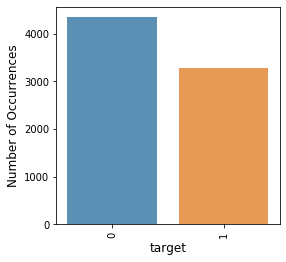

In [56]:
classes = df['target'].value_counts()
plt.figure(figsize=(4,4))
sns.barplot(classes.index, classes.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('target', fontsize=12)
plt.xticks(rotation=90)
plt.show()